# Casual Inference:


In [21]:
! git clone https://github.com/uber/causalml.git
! cd causalml
! pip install -r /content/causalml/docs/requirements.txt

fatal: destination path 'causalml' already exists and is not an empty directory.


In [28]:
! pip install causalml[tf]
! pip install -U numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.4/909.4 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.1 MB/s eta 0:00:00
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 74.5 MB/s eta 0:00:00
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/

In [29]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.20.1 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
causalml 0.14.1 requires scikit-learn<=1.0.2, but you have scikit-learn 1.4.1.post1 which is incompatible.


In [30]:
pip install -U causalml

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.20.1 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
bigframes 0.20.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [8]:
import pandas as pd
data_newfeature=pd.read_csv('Clustered_Customer_Sales_Data.csv')

In [2]:
import pandas as pd
from causalml.inference.meta import LRSRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X = data_newfeature[['Age', 'Member_Year', 'Family_Size', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Income', 'Total_Children', 'Is_Parent']]
data_newfeature['New_Purchases'] = data_newfeature['NumWebPurchases'] + data_newfeature['NumCatalogPurchases'] + data_newfeature['NumStorePurchases']
y = data_newfeature['New_Purchases']
treatment = data_newfeature['Complain']


numeric_features = ['Age', 'Member_Year', 'Family_Size', 'Income', 'Total_Children']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])


X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(X, y, treatment, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'causalml'

In [41]:

from sklearn.metrics import mean_squared_error
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
lrs = LRSRegressor()
lrs.fit(X_train_preprocessed, treatment_train, y_train)


lrs_ate = lrs.estimate_ate(X_train_preprocessed, treatment_train, y_train)
lrs_ite = lrs.predict(X_test_preprocessed)
lrs_rmse = np.sqrt(mean_squared_error(y_test, lrs_ite))
print(f"RMSE for LRSRegressor: {lrs_rmse}")

print(f"Estimated ATE using LRSRegressor: {lrs_ate[0]}")

RMSE for LRSRegressor: 14.875908140172951
Estimated ATE using LRSRegressor: [-0.08619946]


In [42]:
# Initialize and train the model using XGBTRegressor
from causalml.inference.meta import XGBTRegressor
xgbt = XGBTRegressor()
xgbt.fit(X_train_preprocessed, treatment_train, y_train)

# Estimate ATE and ITE
xgbt_ate = xgbt.estimate_ate(X_train_preprocessed, treatment_train, y_train)
xgbt_ite = xgbt.predict(X_test_preprocessed)

# Output results
xgbt_rmse = np.sqrt(mean_squared_error(y_test, xgbt_ite))
print(f"RMSE for XGBTRegressor: {xgbt_rmse}")
print(f"Estimated ATE using XGBTRegressor: {xgbt_ate[0]}")


RMSE for XGBTRegressor: 13.789522648113007
Estimated ATE using XGBTRegressor: [1.24555651]


In [43]:
pip install xgboost shap

In [35]:
pip install --upgrade xgboost

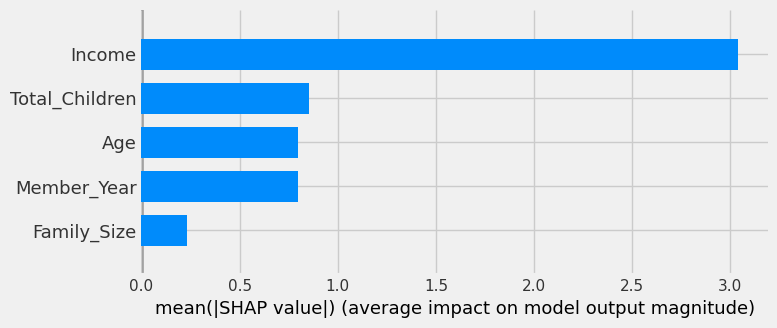

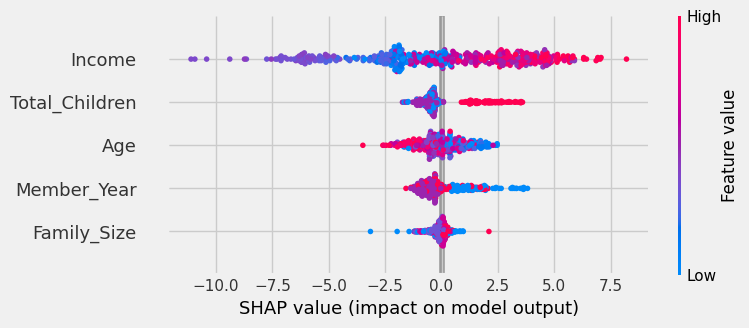

In [44]:
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


t_pred = xgbt_ite


xgb = XGBRegressor()
xgb.fit(X_test_preprocessed, t_pred)


explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_preprocessed)


feature_names = [
    'Age', 'Member_Year', 'Family_Size', 'Income', 'Total_Children', 'Is_Parent',
    'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD'
]


shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names, plot_type="bar")


plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names)


Top bar chart:Income appears to be the most influential feature, followed by Total_Children, Age, Member_Year, and Family_Size. The length of the bar indicates the average impact of the feature on the model's output, with longer bars representing greater impact.
Bottom plot:  higher Income values tend to push the model’s prediction higher (more positive ITE), suggesting that higher income might be associated with a greater likelihood of the outcome defined by your treatment variable, after controlling for the other features.

RMSE:A lower RMSE indicates better predictive accuracy. Here, the XGBTRegressor has a lower RMSE (13.79) compared to the LRSRegressor (14.88), suggesting that the XGBTRegressor is more accurate in predicting the ITE.

ATE:The LRSRegressor estimates an ATE close to zero (-0.086), suggesting little to no average effect of the treatment across the dataset.

The XGBTRegressor estimates a positive ATE (1.246), indicating a positive average effect of the treatment. This suggests that, on average, having a complaint (assuming Complain is coded as 1 for those who complained and 0 for those who did not) is associated with an increase in the Total_purchase.

### Collinearity check (again)

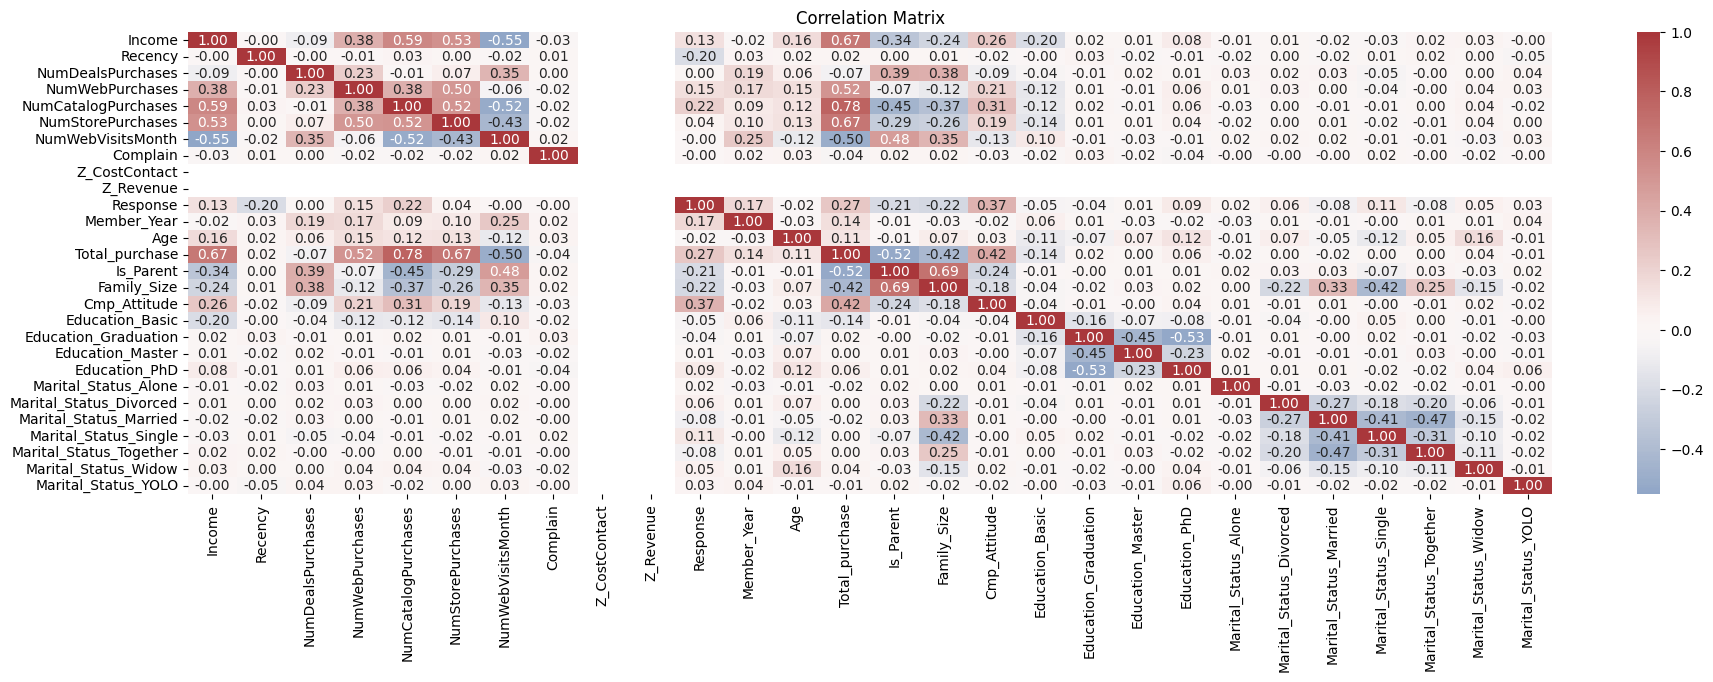

No high correlation.


In [23]:
# Exluding column
exclude = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', \
           'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', \
          'Enroll_Year', 'Enroll_Month', 'Enroll_Day', 'Total_Children']
data3 = data_newfeature.loc[:, ~data_newfeature.columns.isin(exclude)]
corr_matrix2 = data3.corr()
plt.figure(figsize=(22, 6))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation Matrix')
plt.show()

# Setting a threshold of 80% as high correlation
high_correlation2 = corr_matrix2[((corr_matrix2 <= -0.8) & (corr_matrix2 != -1)) | ((corr_matrix2 >= 0.8) & (corr_matrix2 != 1))]
if high_correlation2.isnull().all().all():
    print("No high correlation.")
else:
    print("Correlation Matrix for values <= -0.8 or >= 0.8 (excluding self-compare):")
    print(high_correlation2)

In [24]:
VIF_features2 = add_constant(data3)

VIF2 = pd.Series([variance_inflation_factor(VIF_features2.values, i) for i in range(VIF_features2.shape[1])], \
                 index=VIF_features2.columns)
print(VIF2) # Only the one hot encoded dummies are high, this is not concerning

Income                       2.189564
Recency                      1.065241
NumDealsPurchases            1.645470
NumWebPurchases              1.791511
NumCatalogPurchases          2.908294
NumStorePurchases            2.258293
NumWebVisitsMonth            2.410717
Complain                     1.009666
Z_CostContact                0.000000
Z_Revenue                    0.000000
Response                     1.393304
Member_Year                  1.272689
Age                          1.168285
Total_purchase               5.099083
Is_Parent                    3.304730
Family_Size                  4.949820
Cmp_Attitude                 1.396783
Education_Basic              1.289109
Education_Graduation         3.303163
Education_Master             2.413511
Education_PhD                2.773052
Marital_Status_Alone         2.513707
Marital_Status_Divorced    105.671227
Marital_Status_Married     269.398088
Marital_Status_Single      190.567227
Marital_Status_Together    218.423942
Marital_Stat

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


## Clustering

Show all column names of data3

In [25]:
cluster_data = data3.copy()
cluster_data.columns

Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Member_Year',
       'Age', 'Total_purchase', 'Is_Parent', 'Family_Size', 'Cmp_Attitude',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

train test split data3

use K-means cluster data3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

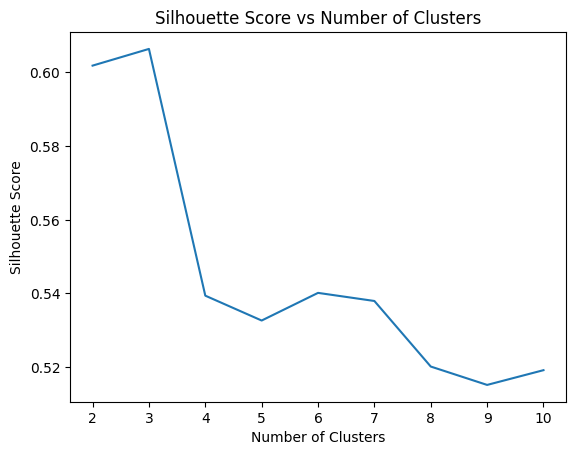

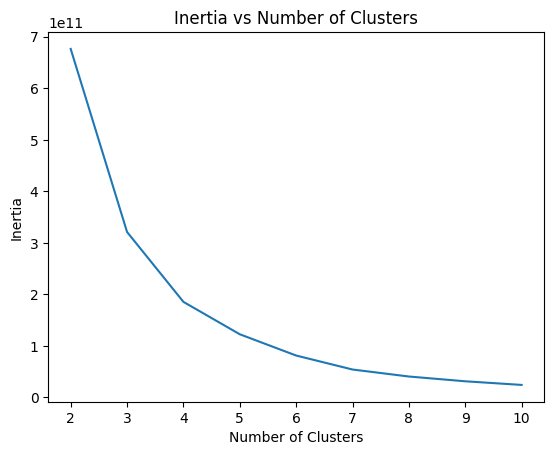

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize empty lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Define a range of cluster numbers to try
cluster_range = range(2, 11)

# Iterate over the cluster range
for n_clusters in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(cluster_data)

    # Get the cluster labels for the test set
    test_labels = kmeans.predict(cluster_data)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(cluster_data, test_labels))

    # Calculate the inertia value
    inertia_values.append(kmeans.inertia_)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Plot the inertia values
plt.plot(cluster_range, inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()


In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data)

# Get the cluster labels for the test set
test_labels = kmeans.predict(cluster_data)

# Append test_labels back to data3
cluster_data['Cluster'] = test_labels

/Users/kellyliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
cluster_data.head()


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Member_Year,Age,Total_purchase,Is_Parent,Family_Size,Cmp_Attitude,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
0,58138.0,58,3,8,10,4,7,0,3,11,1,4,59,1617,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,46344.0,38,2,1,1,2,5,0,3,11,0,2,62,27,1,3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,71613.0,26,1,8,2,10,4,0,3,11,0,3,51,776,0,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,26646.0,26,2,2,0,4,6,0,3,11,0,2,32,53,1,3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,58293.0,94,5,5,3,6,5,0,3,11,0,2,35,422,1,3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [ ]:
cluster_count = cluster_data['Cluster'].nunique()
print("Number of distinct clusters:", cluster_count)
print()
cluster_counts = cluster_data['Cluster'].value_counts()
print(cluster_counts)


Number of distinct clusters: 3

Cluster
1    1151
0    1088
2       1
Name: count, dtype: int64


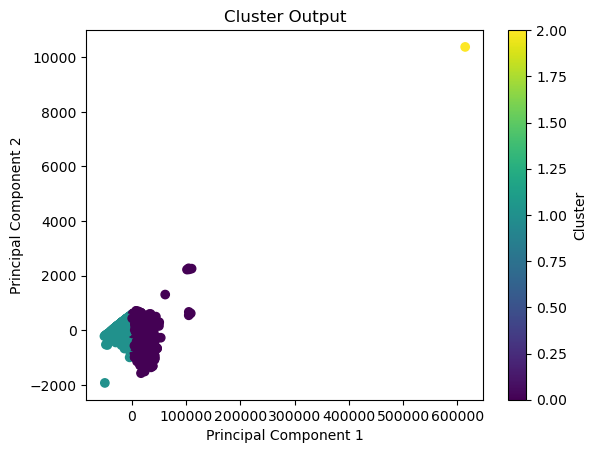

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cluster_data)

# Create a scatter plot to visualize the cluster output
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=test_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Output')
plt.colorbar(label='Cluster')
plt.show()


compare the different cluster based on Income, Total_purchase,  Member_Year, age, Family_Size, Cmp_Attitude, Education, Marital_Status

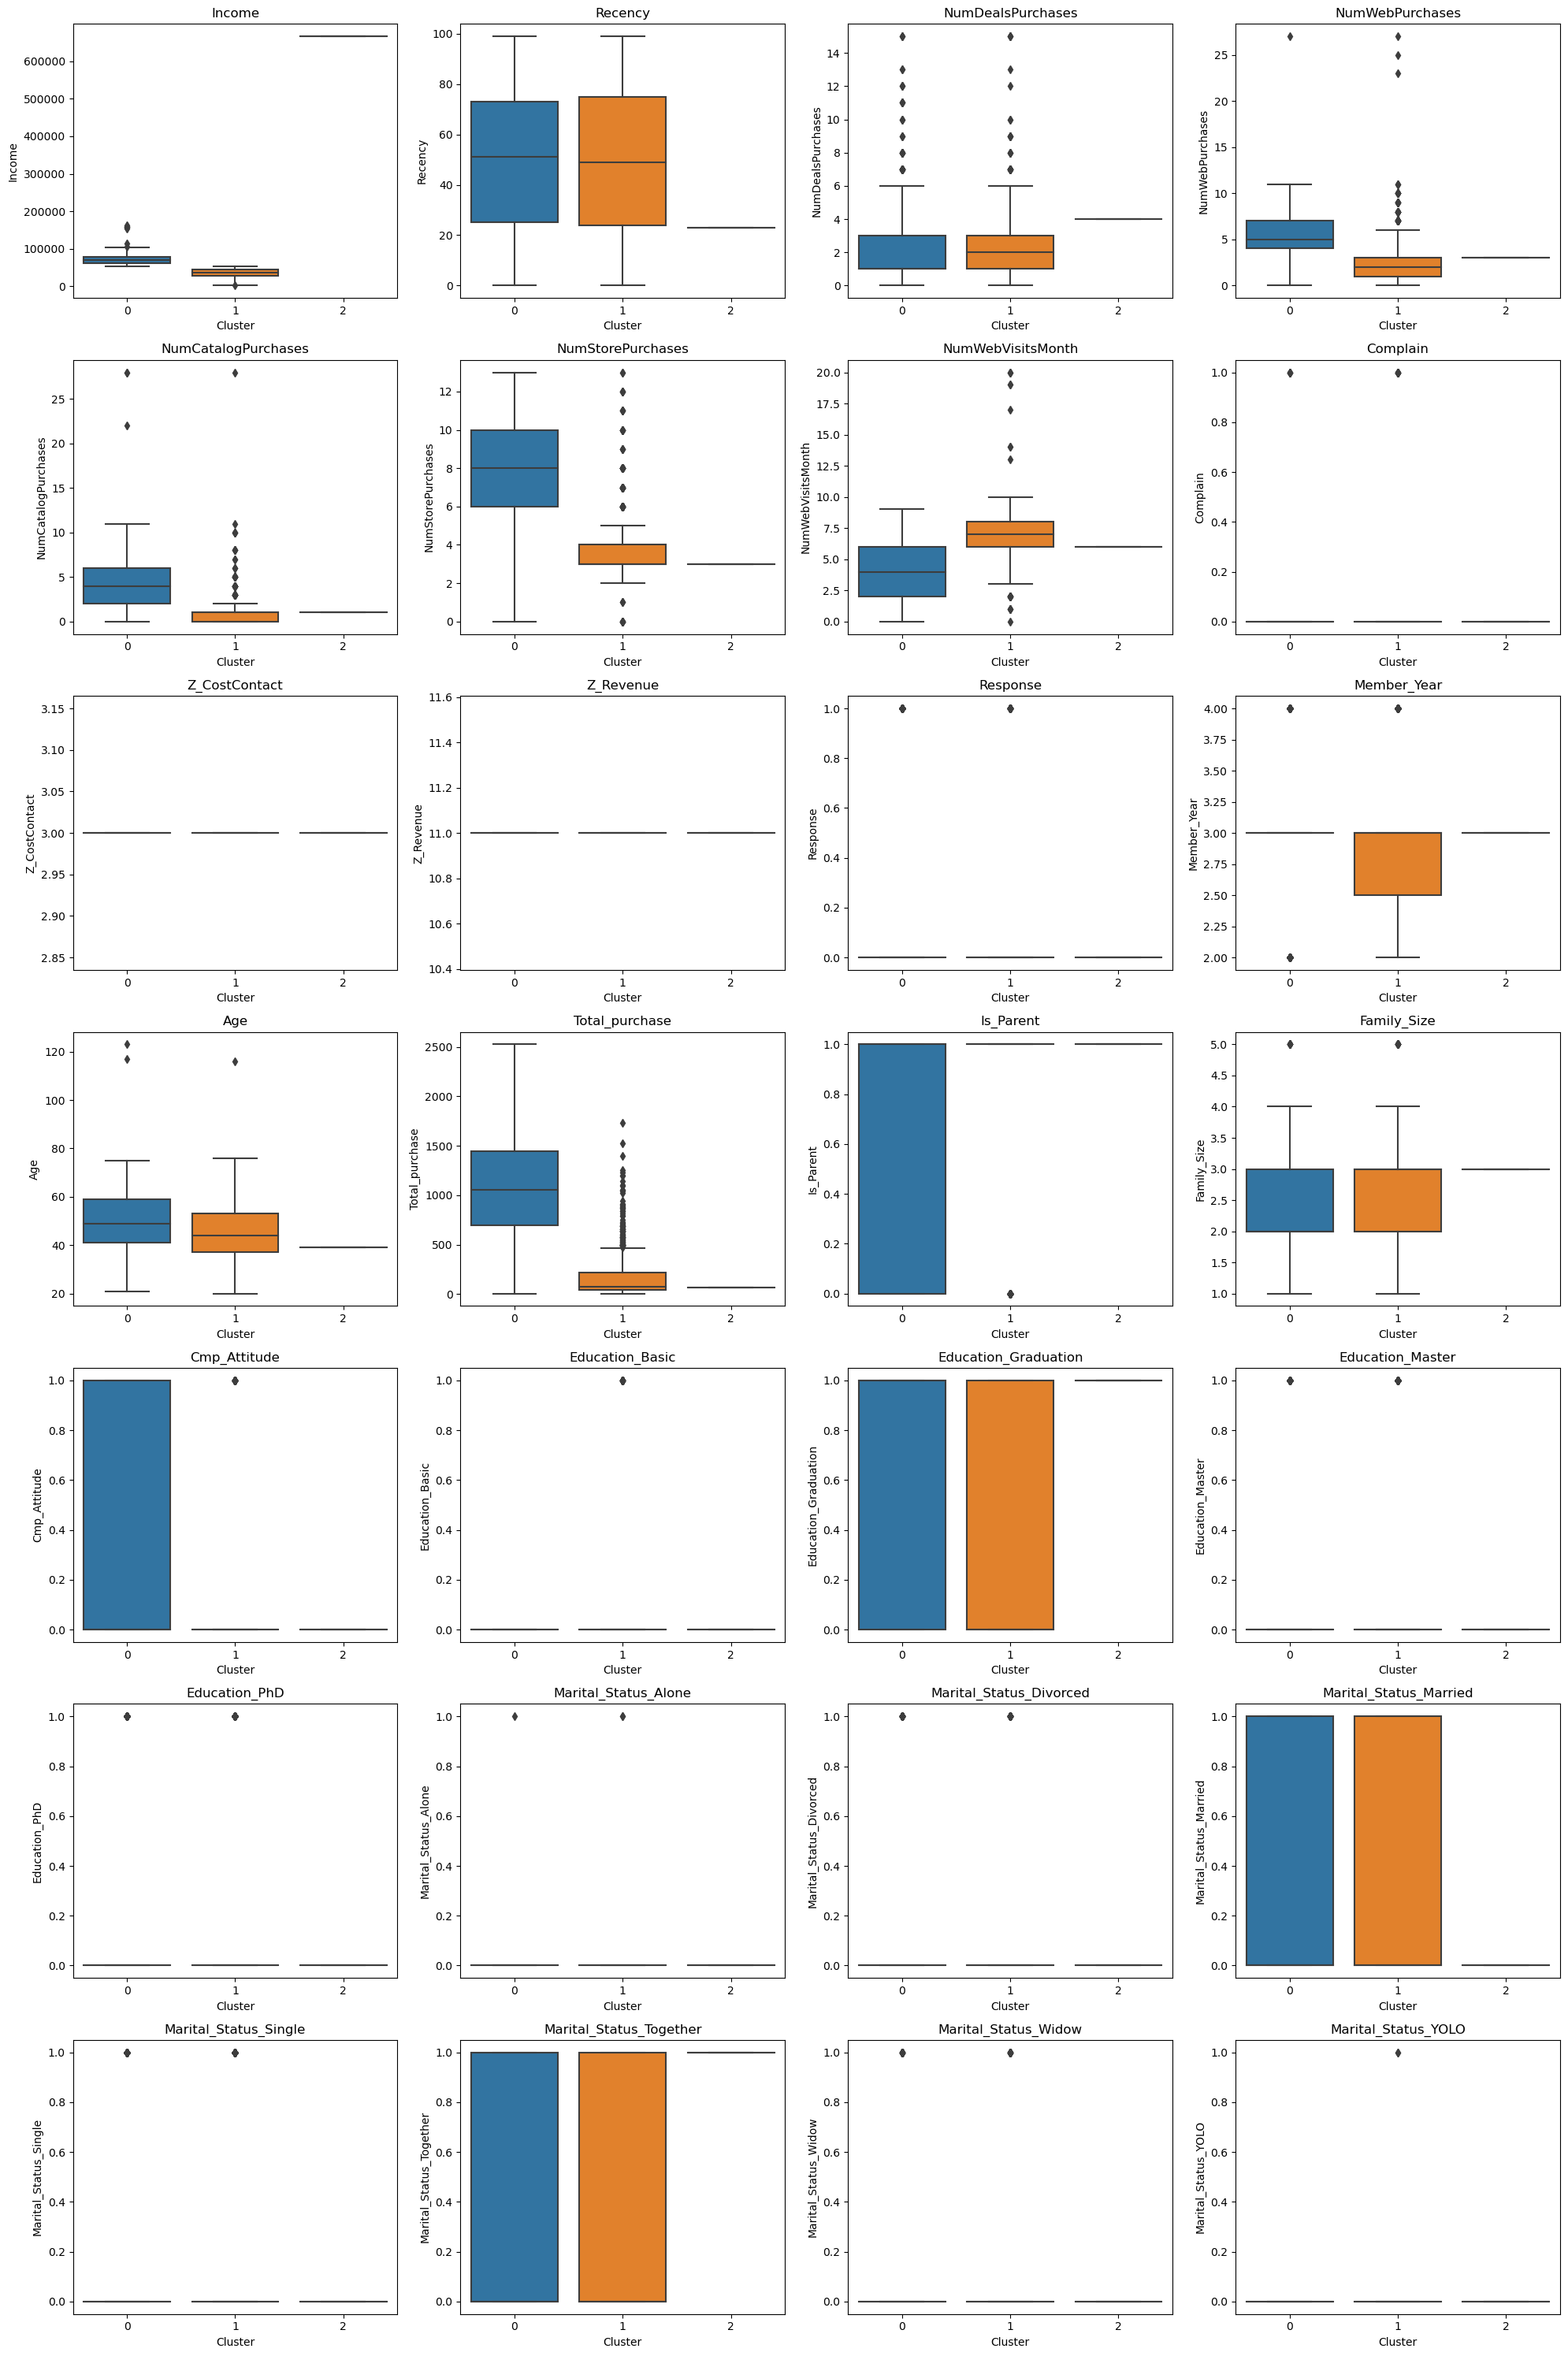

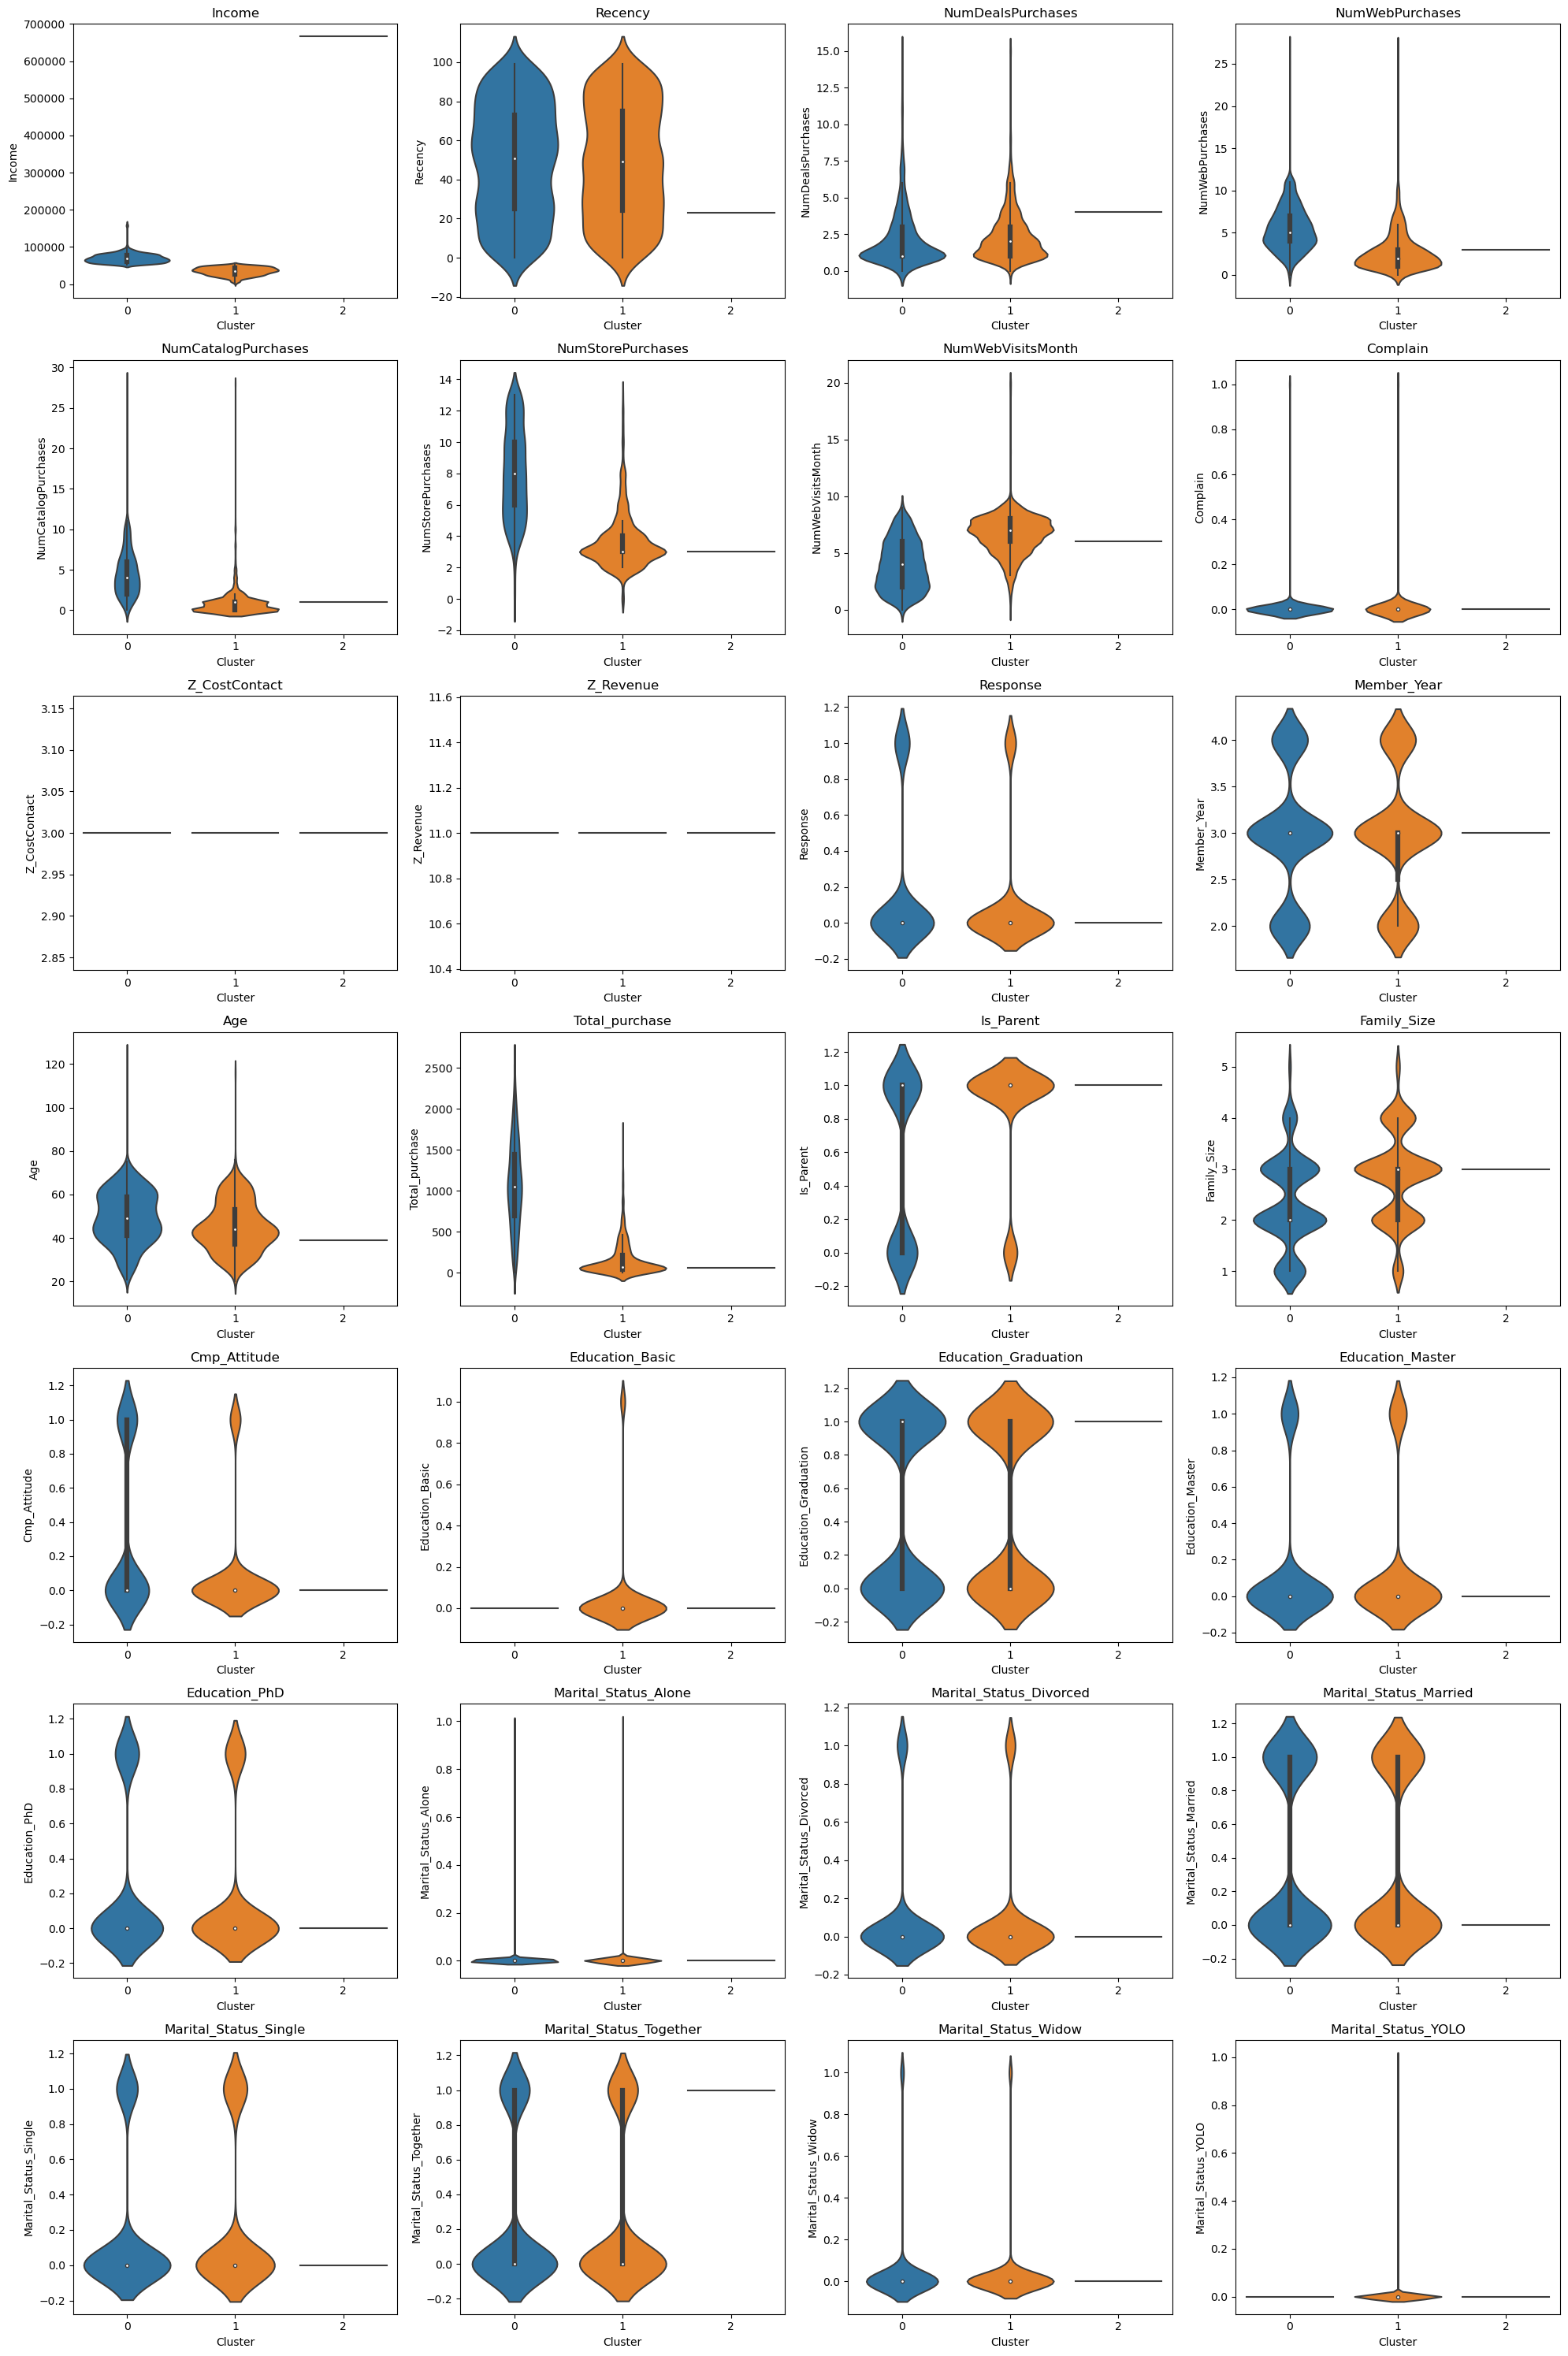

In [ ]:
# Create subplots for boxplots
fig, axes = plt.subplots(7, 4, figsize=(20, 30))

# Iterate over each variable and create boxplots
for i, column in enumerate(cluster_data.columns):
    if i < 28:  # Check if there are still available subplots
        row = i // 4
        col = i % 4

        # Create boxplot
        sns.boxplot(x='Cluster', y=column, data=cluster_data, ax=axes[row, col])
        axes[row, col].set_title(column)
        axes[row, col].set_xlabel('Cluster')
        axes[row, col].set_ylabel(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Create subplots for violin plots
fig, axes = plt.subplots(7, 4, figsize=(20, 30))

# Iterate over each variable and create violin plots
for i, column in enumerate(cluster_data.columns):
    if i < 28:  # Check if there are still available subplots
        row = i // 4
        col = i % 4

        # Create violin plot
        sns.violinplot(x='Cluster', y=column, data=cluster_data, ax=axes[row, col])
        axes[row, col].set_title(column)
        axes[row, col].set_xlabel('Cluster')
        axes[row, col].set_ylabel(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
